In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("trimmed_dataset_fromStep1.csv")

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_5106/1392794904.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("trimmed_dataset_fromStep1.csv")


In [4]:
df.shape

(14481639, 99)

In [5]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,co-applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,254900ACUWEGW702BR80,35614,NY,36061.0,3.606102e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,6,2,1,1,1,2,2,2,415000.0,69.5,5.375,0.407,2,9962.19,NaN,7745.0,6255.0,NaN,360.0,NaN,NaN,2,2,2,2,605000.0,1,1,3,5,1,NaN,118.0,NaN,2,9,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,2,1,2,2,65-74,65-74,Yes,Yes,1,1,2,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3607,36.57,99000,152.12,440,55,0
1,2022,254900ACUWEGW702BR80,35614,NY,36081.0,3.608107e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,2,1,1,1,2,2,2,655000.0,76.471,5.0,0.152,2,8966.72,NaN,4740.0,3250.0,NaN,360.0,NaN,84.0,2,2,2,2,865000.0,1,1,3,5,1,NaN,228.0,30%-<36%,2,9,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,2,5,2,4,25-34,9999,No,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5687,55.57,99000,132.73,1769,597,65
2,2022,254900ACUWEGW702BR80,35154,NJ,34025.0,3.402581e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,2,0,2,1,1,1,2,2,1,455000.0,58.065,5.875,0.953,3,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,2,2,2,2,805000.0,1,3,3,5,1,NaN,169.0,20%-<30%,1,9,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,35-44,9999,No,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5135,19.57,128300,102.28,1416,1679,53
3,2022,254900ACUWEGW702BR80,35154,NJ,34029.0,3.402972e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,6,2,1,1,1,2,2,1,365000.0,63.158,4.125,0.585,2,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,2,2,2,2,575000.0,1,3,3,5,1,NaN,238.0,46,1,9,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,1,2,2,2,35-44,25-34,No,No,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4939,7.90,128300,62.91,685,997,40
4,2022,254900ACUWEGW702BR80,35004,NY,36059.0,3.605941e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Whi

In [6]:
df = df[df['reverse_mortgage'] == 2] # not a reverse mortgage

In [7]:
df.shape

(14098388, 99)

In [8]:
df = df[df['business_or_commercial_purpose'] == 2] # not for business or commercial purpose

In [9]:
df.shape

(13231281, 99)

In [10]:
df = df[df['derived_dwelling_category'] == 'Single Family (1-4 Units):Site-Built'] # Only single family home loans

In [11]:
df.shape

(11978710, 99)

In [12]:
df = df[df['loan_type'] == 1] # 1: conventional only

In [13]:
df.shape

(8569467, 99)

In [14]:
df = df[df['applicant_age_above_62'] == 'No'] # applicant age not above 62

In [15]:
df.shape

(7615476, 99)

In [16]:
df = df[df['occupancy_type'] == 1] # primary residence only

In [17]:
df.shape

(7060315, 99)

In [18]:
df = df[df['manufactured_home_secured_property_type'] == 3]

In [19]:
df.shape

(7060109, 99)

In [20]:
df = df[df['manufactured_home_land_property_interest'] == 5]

In [21]:
df.shape

(7059354, 99)

In [22]:
df = df.drop(columns=[
    "state_code", 
    "county_code", 
    "activity_year", 
    "lei", 
    "derived_msa-md",  
    "census_tract",  
    "derived_loan_product_type",
    "conforming_loan_limit",  
    "purchaser_type",  
    "preapproval",  
    "loan_purpose",  
    "lien_status",  
    "total_loan_costs", 
    "open-end_line_of_credit",  
    "total_points_and_fees",  
    "applicant_ethnicity-2",
    "applicant_ethnicity-3",  
    "applicant_ethnicity-4",  
    "applicant_ethnicity-5",  
    "co-applicant_ethnicity-2", 
    "co-applicant_ethnicity-3",  
    "co-applicant_ethnicity-4",  
    "co-applicant_ethnicity-5",  
    "applicant_race-2",  
    "applicant_race-3",  
    "applicant_race-4",  
    "applicant_race-5",  
    "co-applicant_race-2",  
    "co-applicant_race-3",
    "co-applicant_race-4",  
    "co-applicant_race-5",  
    "aus-1", 
    "aus-2",
    "aus-3",
    "aus-4",
    "aus-5",
    "denial_reason-1",
    "denial_reason-2",
    "denial_reason-3",
    "denial_reason-4",
    "tract_population",
    "tract_minority_population_percent",
    "ffiec_msa_md_median_family_income",
    "tract_to_msa_income_percentage",
    "tract_owner_occupied_units",
    "tract_one_to_four_family_homes",
    "tract_median_age_of_housing_units",
    "reverse_mortgage", 
    "business_or_commercial_purpose",
    "derived_dwelling_category", 
    "loan_type",
    "applicant_credit_score_type",
    "co-applicant_credit_score_type", 
    "co-applicant_ethnicity-1", 
    "co-applicant_ethnicity_observed", 
    "co-applicant_race-1", 
    "co-applicant_race_observed", 
    "co-applicant_sex", 
    "co-applicant_sex_observed",
    "submission_of_application", 
    "initially_payable_to_institution", 
    "co-applicant_age", 
    "applicant_age_above_62", 
    "co-applicant_age_above_62", 
    # addtional columns to drop:
    "rate_spread", 
    "hoepa_status", 
    "origination_charges", 
    "discount_points", 
    "lender_credits", 
    "loan_term", 
    "prepayment_penalty_term", 
    "intro_rate_period", 
    "negative_amortization", 
    "interest_only_payment", 
    "balloon_payment", 
    "other_nonamortizing_features", 
    "construction_method", 
    "occupancy_type", 
    "total_units", 
    "multifamily_affordable_units",
    "action_taken",
    "manufactured_home_secured_property_type", 
    "manufactured_home_land_property_interest",
    # additional columns to drop after Step 3A EDA:
    "applicant_ethnicity_observed", 
    "applicant_race_observed", 
    "applicant_sex_observed",  
])

In [23]:
df.shape

(7059354, 13)

In [24]:
df.head()

,derived_ethnicity,derived_race,derived_sex,loan_amount,loan_to_value_ratio,interest_rate,property_value,income,debt_to_income_ratio,applicant_ethnicity-1,applicant_race-1,applicant_sex,applicant_age
1,Not Hispanic or Latino,White,Female,655000.0,76.471,5.0,865000.0,228.0,30%-<36%,2.0,5.0,2,25-34
4,Not Hispanic or Latino,White,Joint,785000.0,90.0,5.375,875000.0,158.0,42,2.0,5.0,1,35-44
5,Not Hispanic or Latino,White,Female,515000.0,80.0,3.375,645000.0,105.0,NaN,2.0,5.0,2,25-34
6,Joint,White,Joint,705000.0,80.0,6.5,895000.0,194.0,41,2.0,5.0,2,25-34
7,Not Hispanic or Latino,White,Female,305000.0,34.884,3.75,865000.0,230.0,NaN,2.0,5.0,2,25-34


In [25]:
df["interest_rate"] = pd.to_numeric(df["interest_rate"], errors="coerce")
df["loan_to_value_ratio"] = pd.to_numeric(df["loan_to_value_ratio"], errors="coerce")
df["property_value"] = pd.to_numeric(df["property_value"], errors="coerce")

In [26]:
df['interest_rate'].describe().round(2)

count    6344778.00
mean           5.84
std            1.59
min            0.00
25%            5.03
50%            6.12
75%            6.88
max          587.50
Name: interest_rate, dtype: float64

In [27]:
df1 = df[df['interest_rate'] <= 100]

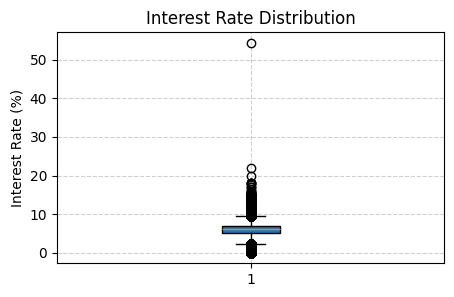

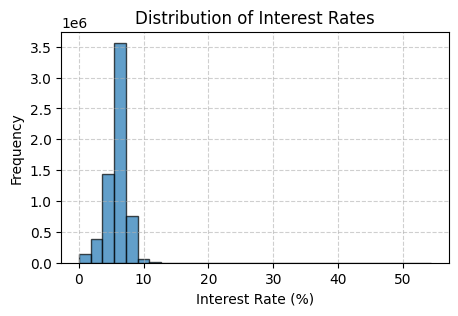

In [28]:
plt.figure(figsize=(5,3))
plt.boxplot(df1['interest_rate'].dropna(), vert=True, patch_artist=True)
plt.title('Interest Rate Distribution')
plt.ylabel('Interest Rate (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(5,3))
plt.hist(df1['interest_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [29]:
final_df = df[ (df['interest_rate'] > 0.01) & (df['interest_rate'] <= 22) ]

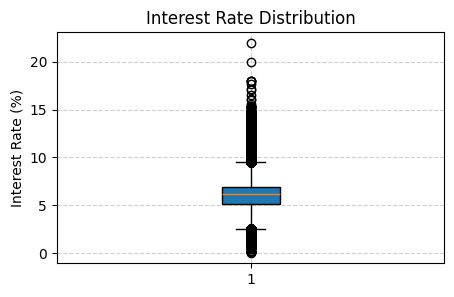

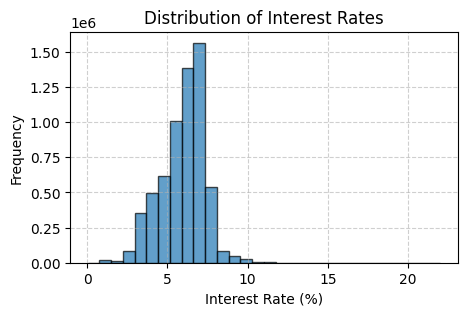

In [30]:
plt.figure(figsize=(5,3))
plt.boxplot(final_df['interest_rate'].dropna(), vert=True, patch_artist=True)
plt.title('Interest Rate Distribution')
plt.ylabel('Interest Rate (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(5,3))
plt.hist(final_df['interest_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [31]:
final_df['interest_rate'].describe().round(2)

count    6228351.00
mean           5.95
std            1.35
min            0.02
25%            5.12
50%            6.12
75%            6.88
max           21.99
Name: interest_rate, dtype: float64

In [32]:
final_df.shape

(6228351, 13)

In [33]:
final_df.to_csv('../Step3/selected_features_dataset_fromStep2.csv', index=False)